<a href="https://colab.research.google.com/github/praveenkumarbalakrishnan/tasks/blob/main/SIG731_Data_Wrangling_Task3P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title:** Task 3P: SIG731-Data Wrangling

**Name:** Praveenkumar Balakrishnan

**Student Number:** 223029369

**Email Address:** s223029369@deakin.edu.au

# Import Statements

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

import warnings
warnings.filterwarnings('ignore')

# Tasks

**Task 1**

From https://github.com/gagolews/teaching-data/tree/master/marek, download the two following excerpts from the National Health and Nutrition Examination Survey (NHANES dataset):

• nhanes_adult_male_bmx_2020.csv

• nhanes_adult_female_bmx_2020.csv

They give body measurements of adult males and females.

Downloaded the given files and uploaded in the input data directory

**Task 2**

Read the two files as numpy matrices named male and female. Each matrix consists of seven
columns:
1. weight (kg),
2. standing height (cm),
3. upper arm length (cm),
4. upper leg length (cm),
5. arm circumference (cm),
6. hip circumference (cm),
7. waist circumference (cm).

Read the data using pandas.read_csv and filtered the commented line starts with "#" and converted it into numpy matrices each consist of 7 columns

In [4]:
male_df = pd.read_csv(
    "/content/drive/MyDrive/Inputs/nhanes_adult_male_bmx_2020.csv",
     comment="#")
female_df = pd.read_csv(
    "/content/drive/MyDrive/Inputs/nhanes_adult_female_bmx_2020.csv",
     comment="#")
male = male_df.to_numpy()
female = female_df.to_numpy()


**Task 3**

On a single plot (use matplotlib.pytplot.subplot), draw two histograms: for female weights (top subfigure). and for male weights (bottom subfigure) Call matplotlib.pyplot.xlim to make the xaxis limits identical for both subfigures (work out the appropriate limits yourself).

The first column in both the loaded numpy array is weight column so took 0th column from male and female numpy arrays and plotted the histogram vertically stacked which is female weight in top subfigure and male weight in bottom subfigure. Used set_xlim to make the xaxis limits identical to both subfigures

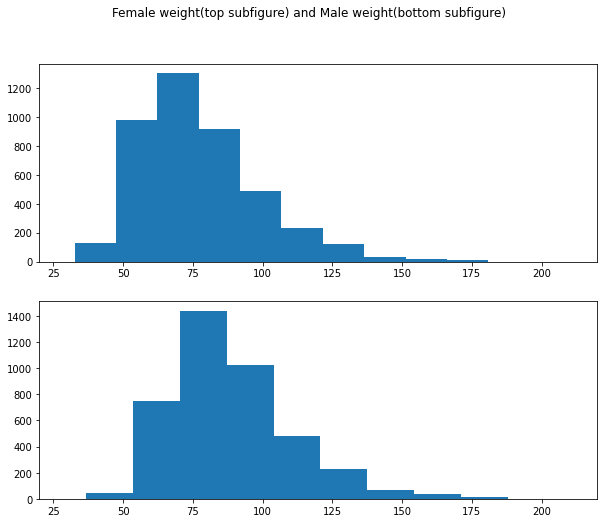

In [5]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))
fig.suptitle('Female weight(top subfigure) and Male weight(bottom subfigure)')
ax1.hist(female[:, 0])
ax2.hist(male[:, 0])
ax1.set_xlim(left=20, right=220)
ax2.set_xlim(left=20, right=220)
plt.show()

**Task4**

Call matplotlib.pyplot.boxplot to draw a box-and-whisker plot, with two boxes side by side, giving the male and female weights so that they can be compared to each other. Note that the boxplot function can be fed with a list of two vectors like [female_weights, male_weights]. In your own words, discuss the results.

The first column in both the loaded numpy array is weight column so took 0th column from male and female numpy arrays and plotted the box plot side by side

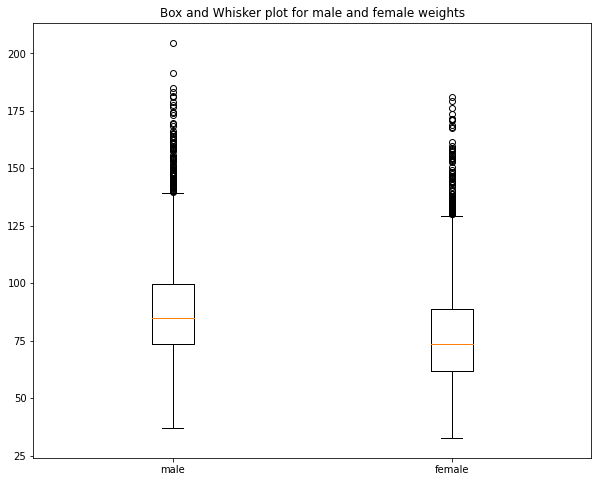

In [7]:
plt.figure(figsize=(10, 8))
plt.title("Box and Whisker plot for male and female weights")
male_weights = male[:, 0]
female_weights = female[:, 0]
plt.boxplot(
    x=[male_weights, female_weights],
    labels=["male", "female"])
plt.show()

In the above boxplot we can see significant outliers in both the male and female weights also the maximum weight of male is higher compared to maximum weight of female. The outliers are only in the upper side which is above 
Q3 + 1.5 times of IQR and no outliers in the lower side which is below 
Q1 - 1. times of IQR. In both male and female weights median is closer to lower quartile(Q1) compared to the upper quartile(Q3). Median closer to lower quartile and outliers are only in upperside indicates that the data is possitively skewed.

**Task5**

Compute the basic numerical aggregates of the male and female weights (measures of location,
dispersion, and shape). In your own words, describe and compare the two distributions (e.g., are
they left skewed, which one has more dispersion, and so forth).

In [23]:
def generate_numerical_stats(input_np_array, label):
  """
  This function is to generate numerical stats for the given input. It will 
  generate minimum, 25th percentile, mean, median, 75th percentile, maximum,
  iqr, std and skewness and print the same.

  Parameters
  ----------
  input_np_array: numpy array
    numpy array
  label: str
    Label for the print statement
  Returns
  -------
  min_val: float
    Minimum value of the given array
  q1_val: float
    25th percentile of the given array
  mean_val: float
    Arithmetic mean of the given array
  median_val: float
    50th percentile of the given arary
  q3_val: float
    75th percentile of the given array
  max_val: float
    Maximum value of the given array
  iqr: float
    Inter quartile range of the given array
  std_val: float
    Standard deviation of the given arary
  skewness_val: float
    Skewness of the given array
  """
  mean_val = np.mean(input_np_array)
  min_val, q1_val, median_val, q3_val, max_val = np.quantile(
      input_np_array, [0.0, 0.25, 0.5, 0.75, 1.0])
  iqr_val = q3_val - q1_val
  std_val = np.std(input_np_array)
  skewness_val = scipy.stats.skew(input_np_array)
  print(
      f"Minimum value of the {label} is {min_val}\n" +
      f"25th percentile of the {label} is {q1_val}\n" +
      f"Mean of the {label} is {mean_val}\n" +
      f"Median of the {label} is {median_val}\n" +
      f"75th percentile of the {label} is {q3_val}\n" +
      f"Maximum value of the {label} is {max_val}\n" +
      f"IQR of the {label} is {iqr_val}\n" +
      f"Standard deviation of the {label} is {std_val}\n" +
      f"Skewness of the {label} is {skewness_val}\n"
  )
  return (min_val, q1_val, mean_val, median_val,
          q3_val, max_val, iqr_val, std_val, skewness_val)

In [26]:
(mw_min_val, mw_q1_val, mw_mean_val,
 mw_median_val, mw_q3_val, mw_max_val,
 mw_iqr_val, mw_std_val, mw_skewness_val) = generate_numerical_stats(
     male[:, 0], "male weight"
 )

(fw_min_val, fw_q1_val, fw_mean_val,
 fw_median_val, fw_q3_val, fw_max_val,
 fw_iqr_val, fw_std_val, fw_skewness_val) = generate_numerical_stats(
     female[:, 0], "female weight"
 )

Minimum value of the male weight is 36.8
25th percentile of the male weight is 73.3
Mean of the male weight is 88.36454300416565
Median of the male weight is 85.0
75th percentile of the male weight is 99.8
Maximum value of the male weight is 204.6
IQR of the male weight is 26.5
Standard deviation of the male weight is 21.418936717962495
Skewness of the male weight is 0.9842810741662347

Minimum value of the female weight is 32.6
25th percentile of the female weight is 61.6
Mean of the female weight is 77.40379057095475
Median of the female weight is 73.6
75th percentile of the female weight is 88.7
Maximum value of the female weight is 180.9
IQR of the female weight is 27.1
Standard deviation of the female weight is 21.54250829019315
Skewness of the female weight is 1.03336107186799



Mean of both male and female weights are higher than the median of the corresponding weights which indicates that both the male and female weights are positively skewed. Based on the measures of location(minimum, 25th percentile, mean, median, 75th percentile, maximum) it been evident that the male weights are higher in general compared to the female weights. Standard deviation of male weights is little bit lower then female weights and iqr(i.e central portion of data spread) of male weights is lower than the female weights which means female weights have more dispersion compared to male weights. Skeness values are closer to 1 for both male and female weights which indicates that the data is right skewed.

**Task 6**

To the female matrix, add the eight column which gives the body mass indices of all the female participants.

In [35]:
def get_bmi(weights, heights):
  """
  This function is to generate bmi for the corresponding weigthts and heights,
  values in the input lists should be mapped to it's index. Data will be 
  validated for equal length, minimum and maximum values before generating the 
  bmis. Incase of an validation failure exception will be thrown and bmis will
  not be calculated.
  Note: BMI is rounded off to 2 decimal points

  Parameters
  ----------
  weights: list(float)
    List of weights
  heigts: list(float)
    List of heights in cm

  Returns
  -------
  bmis : list(float)
    List of bmis for the corresponding weight and height
  """
  bmis = []
  if len(weights) != len(heights):
    raise Exception("Given weights and heights list are in different length")
  for i in range(len(weights)):
    bmis.append(round((weights[i]) / (heights[i] ** 2), 2))
  return bmis